<a href="https://colab.research.google.com/github/michelgoncalves/projects/blob/master/MAG_Analisando_os_Dados_do_Airbnb_OTTAWA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Ottawa
*por **Michel Antônio Gonçalves** - https://linkedin.com/in/michel-antonio-goncalves*

---
---


O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

<img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg">

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.


<img src="https://gd-canada.sfo2.cdn.digitaloceanspaces.com/2016/06/Ottawa2-1.jpg" width="640px">


Neste *notebook*, iremos analisar os dados referentes à cidade de **Ottawa - capital do Canadá, localizada na província de Ontário**, e ver quais *insights* podem ser extraídos a partir de dados brutos.

---
---


## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv`- *Summary information and metrics for listings in Ottawa (good for visualisations).*

O referido arquivo, que consiste em um arquivo csv contendo 3201 entradas e 16 colunas, será importado para uma estrutura DataFrame (df) e será manipulado e analisado por meio da biblioteca *pandas*.


In [0]:
# importar os pacotes necessarios

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [0]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv("http://data.insideairbnb.com/canada/on/ottawa/2019-09-30/visualisations/listings.csv")


In [0]:
df.shape

(3201, 16)

## Análise dos Dados

Para criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados, abaixo encontra-se um glossário com a identificação e significado de cada uma das variáveis (colunas) presentes no dataset utilizado nesta análise.  

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - nome do proprietário (anfitrião) 
* `neighbourhood_group` - coluna sem valor válido 
* `neighbourhood` - nome do bairro (em Ottawa denominado *ward*)
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - tipo de quarto oferecido 
* `price` - preço do aluguel do imóvel 
* `minimum_nights` - quantidade mínima de noites para reserva
* `number_of_reviews` - número de reviews sobre a propriedade
* `last_review` - data da última review 
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,34220,Room available,147438,Mark,NaN,Capital,45.40924,-75.67900,Private room,203,7,0,NaN,NaN,1,365
1,36642,City Conveniences A Country Setting,157787,Donna,NaN,Kitchissippi,45.40159,-75.74679,Private room,65,2,85,2019-09-14,0.76,1,364
2,59258,Lower level of my house to rent,284351,Elena,NaN,Bay,45.35900,-75.80314,Entire home/apt,200,3,1,2011-07-04,0.01,1,0
3,158824,DOWNTOWN/GLEBE HOUSE WITH BACKYARD,87296,Luc,NaN,Capital,45.40248,-75.69941,Entire home/apt,140,3,7,2015-08-30,0.07,1,59
4,261065,Westboro Village Executive Suite,1369632,Glenn,NaN,Kitchissippi,45.38972,-75.75496,Entire home/apt,150,2,56,2019-08-25,0.59,1,282


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e descobrir qual o tipo de dado utilizado em cada coluna.

O *dataset* utilizado nesta análise representa a versão resumida do estudo do Airbnb sobre a cidade de Ottawa. Na mesma página do site em que baixamos o arquivo `listings.csv`, está disponível o estudo completo por meio do arquivo denominado `listings.csv.gz`.

In [0]:
# identificar o volume de dados do DataFrame

print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 3201
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

---

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.00000
reviews_per_month                 0.13527
last_review                       0.13527
availability_365                  0.00000
calculated_host_listings_count    0.00000
number_of_reviews                 0.00000
minimum_nights                    0.00000
price                             0.00000
room_type                         0.00000
longitude                         0.00000
latitude                          0.00000
neighbourhood                     0.00000
host_name                         0.00000
host_id                           0.00000
name                              0.00000
id                                0.00000
dtype: float64

*Observações:*

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* 13,5% das entradas nas variáveis `reviews_per_month` e `last_review` possuem valores nulos.




---


### **Q3. Qual o tipo de distribuição das variáveis?** 

Para melhor observação sobre a distribuição dos dados, foram plotados histogramas para cada uma das variáveis numéricas do dataset.

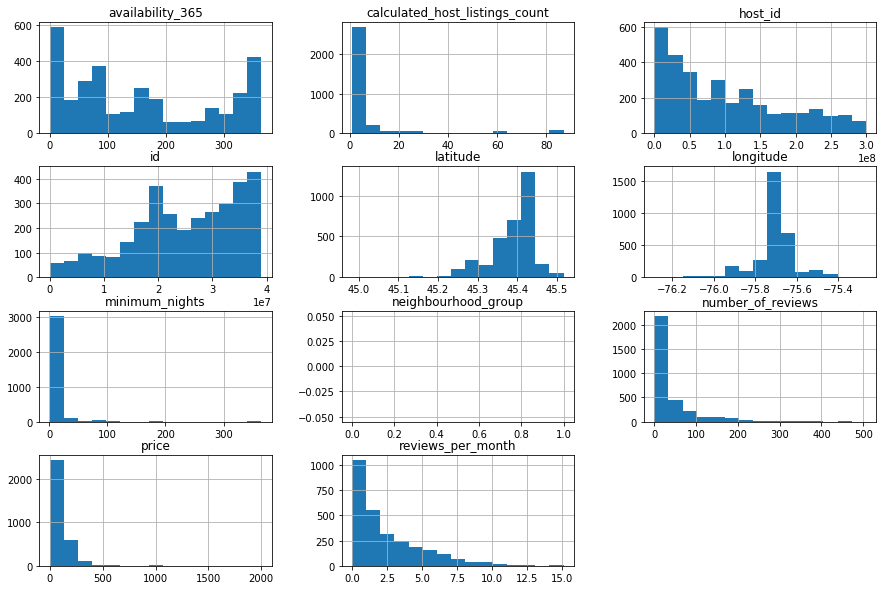

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

---

### **Q4. Existem *outliers* presentes?**

#### **Para detecção de *outliers*, alguns passos serão seguindos:**

1) Levantamento do resumo estatístico das variáveis numéricas


In [0]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3201.000000,3201.000000,3201.000000,2768.000000,3201.000000,3201.000000
mean,112.419869,6.165573,37.302718,2.485289,6.963137,156.698844
std,119.519214,24.624595,59.035460,2.428315,16.504182,126.397053
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,56.000000,1.000000,2.000000,0.630000,1.000000,51.000000
50%,86.000000,2.000000,13.000000,1.625000,2.000000,132.000000
75%,128.000000,2.000000,47.000000,3.700000,4.000000,282.000000
max,2000.000000,365.000000,506.000000,15.080000,87.000000,365.000000


*Observações:*

* Na variável `price` 75% das entradas possuem o preço abaixo de 128, contudo, o preço máximo é 2000.
* Na variável de quantidade mínima de noites (`minimum_nights`), 75% das entradas apresentam o valor de 2 dias, porém, o valor máximo é de 365 dias no ano. Tal discrepância afeta e distorce a representação gráfica do dataset.
*  Em `number_of_reviews`, 75% dos valores estão abaixo de 47, enquanto o valor máximo é 506.




2) Aprofundamento da análise via boxplots sobre as variáves `price`, `minimum_nights` e `number_of_reviews`

* Boxplot para `price`

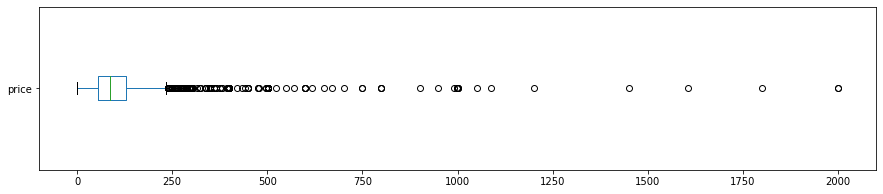


price: valores acima de 500
43 entradas
1.3433%


In [0]:
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver a quantidade e percentual de entradas acima de 500 para price
print("\nprice: valores acima de 500")
print("{} entradas".format(len(df[df.price > 500])))
print("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0])*100))

* Boxplot para `minimum_nights`

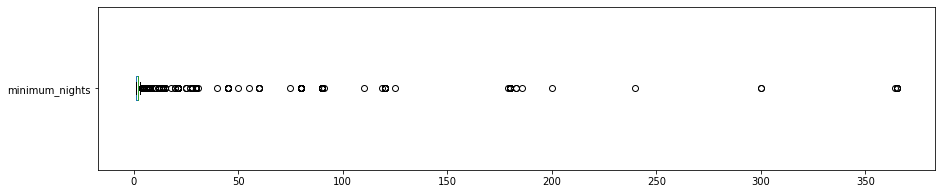

minimum_nights: valores acima de 100:
34 entradas
1.0622%


In [0]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 100 dias para minimum_nights
print("minimum_nights: valores acima de 100:")
print("{} entradas".format(len(df[df.minimum_nights > 100])))
print("{:.4f}%".format((len(df[df.minimum_nights > 100]) / df.shape[0])*100))

* Boxplot para `number_of_reviews`

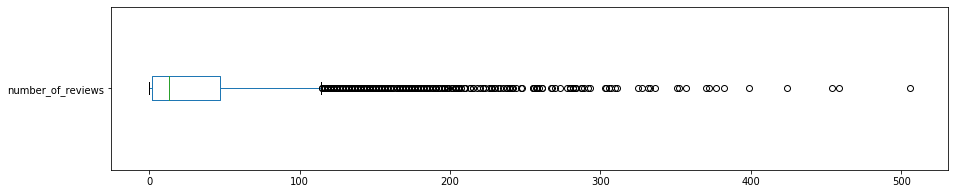

number_of_review: valores acima de 50:
73 entradas
2.2805%


In [0]:
df.number_of_reviews.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print("number_of_review: valores acima de 50:")
print("{} entradas".format(len(df[df.minimum_nights > 50])))
print("{:.4f}%".format((len(df[df.minimum_nights > 50]) / df.shape[0])*100))

#### **Passos para atualização do dataframe sem os *outliers*:**

1) Remoção dos *outliers* nas variáveis `price`, `minimum_nights` e `number_of_reviews`

In [0]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 100].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 50].index, axis=0, inplace=True)

2) Remoção da variável `neighbourhood_group`, pois a mesma não possui valores

In [0]:
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

3) Plotagem dos histogramas das variáveis numéricas sem os outliers

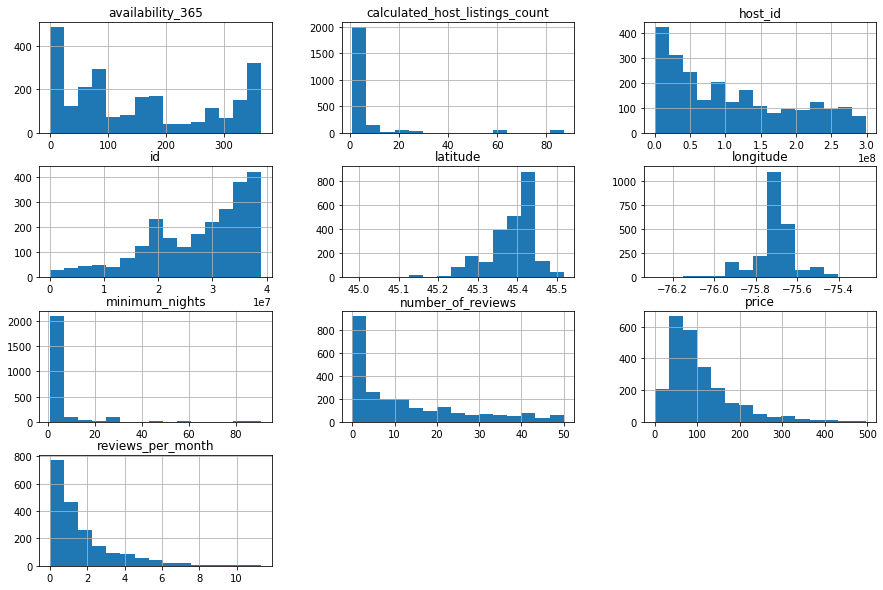

In [0]:
df_clean.hist(bins=15, figsize=(15,10));

4) Atualização da descrição das variáveis numéricas após limpeza dos *outliers*

* Resumo estatístico **antes** da limpeza dos *outliers*:

In [0]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3201.000000,3201.000000,3201.000000,2768.000000,3201.000000,3201.000000
mean,112.419869,6.165573,37.302718,2.485289,6.963137,156.698844
std,119.519214,24.624595,59.035460,2.428315,16.504182,126.397053
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,56.000000,1.000000,2.000000,0.630000,1.000000,51.000000
50%,86.000000,2.000000,13.000000,1.625000,2.000000,132.000000
75%,128.000000,2.000000,47.000000,3.700000,4.000000,282.000000
max,2000.000000,365.000000,506.000000,15.080000,87.000000,365.000000


* Resumo estatístico **após** a limpeza dos *outliers*:

In [0]:
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2383.000000,2383.000000,2383.000000,1984.000000,2383.000000,2383.000000
mean,103.942509,4.636593,12.028116,1.680136,7.135963,153.265632
std,73.671187,11.427854,13.428186,1.771710,16.479944,126.840477
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,50.000000,1.000000,1.000000,0.460000,1.000000,46.500000
50%,85.000000,2.000000,7.000000,1.000000,2.000000,124.000000
75%,130.000000,3.000000,19.000000,2.222500,4.000000,276.000000
max,497.000000,91.000000,50.000000,11.330000,87.000000,365.000000


---

### **Q5. Qual a média dos preços de aluguel?**

Já utilizando o dataset limpo (df_clean), calcularemos a seguir o valor exato da média do preço de aluguel das hospedagens do AirBnb disponíveis na cidade de Ottawa:

In [0]:
# ver a média da coluna `price``
df_clean.price.mean()

# ou

df_clean['price'].mean()


103.94250944187998

* Para melhorar a visualização, o valor será arredondado para duas casas decimais 

In [0]:
round(df_clean['price'].mean(), 2)

103.94

*Resumo da análise:*

Média de aluguel de hospedagens do AirBnb em Ottawa: **103.94 CAD**

---

### **Q6. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. 

**Para identificar as correlações existentes entre as variáveis de interesse, seguiremos dois passos:**

1) Criação de uma matriz de correlação

In [0]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.033734,-0.054104,-0.027120,-0.035529,0.051251
minimum_nights,-0.033734,1.000000,-0.097572,-0.139782,0.015704,0.052628
number_of_reviews,-0.054104,-0.097572,1.000000,0.411118,-0.057370,-0.019585
reviews_per_month,-0.027120,-0.139782,0.411118,1.000000,0.049950,0.038912
calculated_host_listings_count,-0.035529,0.015704,-0.057370,0.049950,1.000000,0.089567
availability_365,0.051251,0.052628,-0.019585,0.038912,0.089567,1.000000


2) Geração de um mapa de calor *(heatmap)* a partir dessa matriz, usando a biblioteca `seaborn`

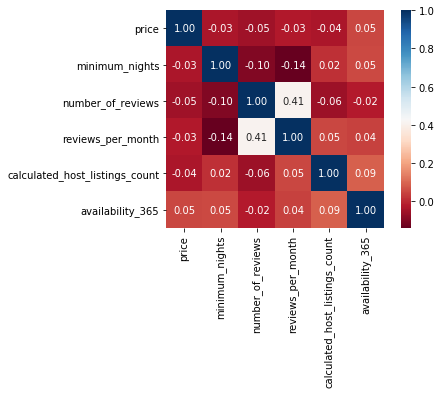

In [0]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

---

### **Q7. Qual o tipo de imóvel mais alugado, via Airbnb, na cidade de Ottawa?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Em Ottawa, o Airbnb apresenta as seguintes opções de hospedagem para aluguel: 

* *Entire home/apt*: apartamentos/casas inteiras 
* *Private room*: quarto particular 
* *Hotel room*: quarto de hotel 
* *Shared room*: quarto compartilhado


Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    1262
Private room       1050
Hotel room           40
Shared room          31
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.529585
Private room       0.440621
Hotel room         0.016786
Shared room        0.013009
Name: room_type, dtype: float64

*Resumo da análise:*

* Apartamentos/casas inteiras: **52,9%**
* Quarto particular: **44%**
* Quarto de hotel: **1,6%**
* Quarto compartilhado: **1,3%**

---

### **Q8. Qual a localidade mais cara em Ottawa para se alugar uma hospedagem via Airbnb?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [0]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
West Carleton-March    162.234043
Kitchissippi           121.732484
Somerset               120.372483
Capital                118.128049
Rideau-Vanier          112.439732
Rideau-Goulbourn       106.972222
College                104.026316
Rideau-Rockcliffe      101.619835
Orleans                 93.837209
Bay                     93.123288
Name: price, dtype: float64

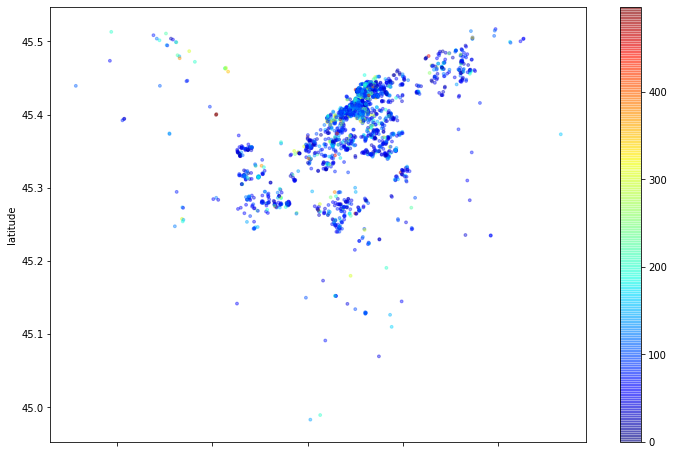

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

*Resumo da análise:*

* O bairro (*ward*) em Ottawa com a média mais cara de aluguel via Airbnb é **West Carleton-March**, com o valor médio de hospedagem de **162.23 CAD**.

---

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [0]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

4.636592530423836

In [0]:
round(df_clean.minimum_nights.mean(), 2)

4.64

*Resumo da análise:*

Média do mínimo de noites para aluguel de hospedagem, via Airbnb, em Ottawa: **4,64 dias**

---




<img src="https://gd-canada.sfo2.digitaloceanspaces.com/2016/05/Rideau-Canal-Ottawa.jpg" width="640px">




## Conclusões


* Esta foi uma análise superficial sobre a base de dados do Airbnb e, mesmo com apenas 16 váriaveis, foi possível a detecção de ***outliers*** que causaram distorções, especialmente nas variáveis sobre **preço**, **número mínimo de noites** e **número de reviews**. 

* Devido à considerável discrepância de valores provocados pelos *outliers*, foi necessária uma extensiva limpeza dos dados e eliminação de um percentual de entradas para que a análise fosse capaz de apresentar valores e indicadores mais precisos.

* Esta análise teve o objetivo de ser apenas um estudo inicial da base de dados do Airbnb sobre a cidade de Ottawa. Para um estudo mais aprofundado da mesma cidade, recomenda-se a utilização do conjunto de dados completos, contendo 106 variáveis.  